## GAN with Tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

c:\users\hp\anaconda2\envs\translator\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Interpolation between images using GAN

#### Train a GAN on MNIST

In [3]:
 def variables_from_scope(scope_name):
    """
    Returns a list of all trainable variables in a given scope. This is useful when
    you'd like to back-propagate only to weights in one part of the network
    (in our case, the generator or the discriminator).
    """
    return tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope=scope_name)
def visualize_row(images, img_dim=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a row
    in a plot, using `cmap` to map from numbers to colors.
    """
    im = np.concatenate(np.reshape(images, [-1,img_dim,img_dim]), 1)
    plt.figure()
    plt.axis('off')
    plt.imshow(im, cmap=cmap)
    plt.show()

In [4]:
 # Graph parameters
z_dimension = 32
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 70
iterations = 30000

In [5]:
#generator
def generator(z):
    hidden_layer = tf.layers.dense(z, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X

In [6]:
 # Discriminator
def discriminator(images):
    hidden_layer = tf.layers.dense(images, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

In [7]:
tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
z = tf.placeholder(tf.float32, [None, z_dimension])

# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X)
    scope.reuse_variables()
    d_on_real = discriminator(real_X)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()

Iter [       0] Time [0.1434] d_loss [1.1214]


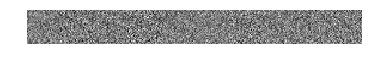

Iter [    1000] Time [7.9238] d_loss [0.0314]


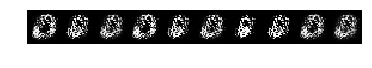

Iter [    2000] Time [15.5698] d_loss [0.0399]


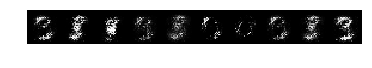

Iter [    3000] Time [23.2716] d_loss [0.0313]


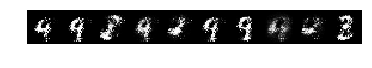

Iter [    4000] Time [30.8906] d_loss [0.1064]


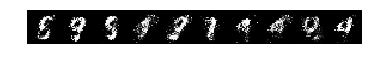

Iter [    5000] Time [38.5195] d_loss [0.0530]


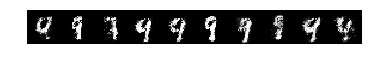

Iter [    6000] Time [46.0864] d_loss [0.1597]


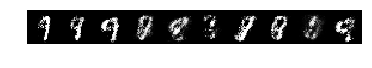

Iter [    7000] Time [53.6639] d_loss [0.2082]


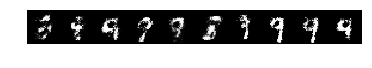

Iter [    8000] Time [61.3048] d_loss [0.2315]


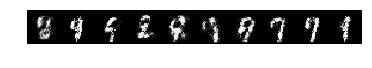

Iter [    9000] Time [69.0051] d_loss [0.3903]


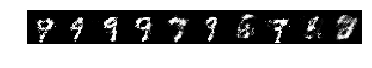

Iter [   10000] Time [76.5885] d_loss [0.5519]


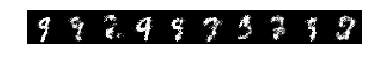

Iter [   11000] Time [84.4113] d_loss [0.4631]


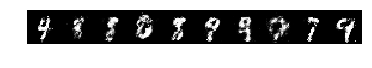

Iter [   12000] Time [92.6842] d_loss [0.6672]


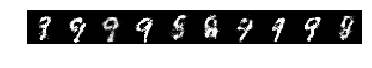

Iter [   13000] Time [100.4834] d_loss [0.6075]


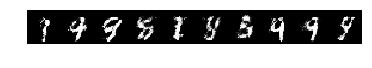

Iter [   14000] Time [108.0147] d_loss [0.6404]


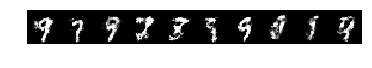

Iter [   15000] Time [115.8147] d_loss [0.7584]


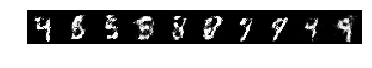

Iter [   16000] Time [123.2931] d_loss [0.7170]


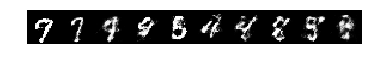

Iter [   17000] Time [131.2231] d_loss [0.7497]


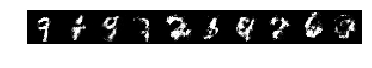

Iter [   18000] Time [139.6934] d_loss [0.7802]


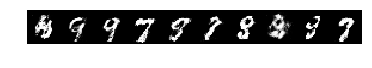

Iter [   19000] Time [148.3927] d_loss [0.7152]


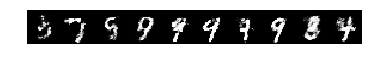

Iter [   20000] Time [156.7167] d_loss [0.7833]


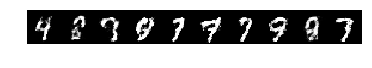

Iter [   21000] Time [165.0166] d_loss [0.5296]


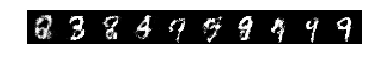

Iter [   22000] Time [172.9042] d_loss [0.5484]


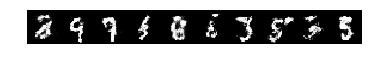

Iter [   23000] Time [180.7746] d_loss [0.5754]


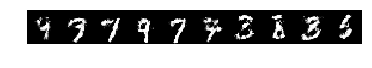

Iter [   24000] Time [188.6348] d_loss [0.6227]


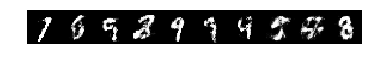

Iter [   25000] Time [196.4325] d_loss [0.7293]


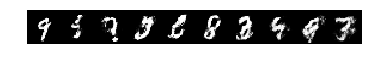

Iter [   26000] Time [204.4546] d_loss [0.5889]


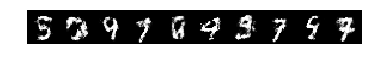

Iter [   27000] Time [212.4368] d_loss [0.6083]


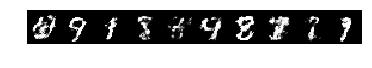

Iter [   28000] Time [220.4387] d_loss [0.5084]


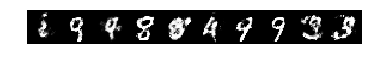

Iter [   29000] Time [228.2838] d_loss [0.7852]


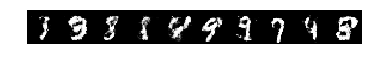

Iter [   29999] Time [236.1962] d_loss [0.6021]


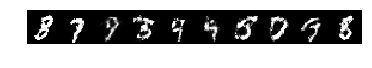

In [31]:
# Train the GAN.
def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    return {real_X: mnist.train.next_batch(batch_size)[0],
            z:      make_noise()}
saver = tf.train.Saver()
#sess = tf.Session()
#sess.run(initialize_all)

start_time = time.time()
with tf.Session() as sess:
    sess.run(initialize_all)
    for t in range(iterations):
        sess.run(g_step, feed_dict=next_feed_dict())
        _, loss = sess.run([d_step, d_loss], feed_dict=next_feed_dict())

        if t % 1000 == 0 or t+1 == iterations:
            fake_data = sess.run(fake_X, feed_dict={z: make_noise()})
            print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
            visualize_row(fake_data[:10])
            save_path = saver.save(sess, "temp/model.ckpt")

## Generate some 10 images, by first drawing samples, $\epsilon$, from the simple distribution and then feeding them through the generator.

INFO:tensorflow:Restoring parameters from temp/model.ckpt


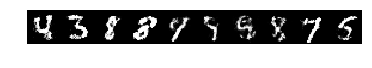

In [32]:
noise=np.random.uniform(-1.0, 1.0, [10, z_dimension])
saver = tf.train.Saver()
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "temp/model.ckpt")
    fake_data = sess.run(fake_X, feed_dict={z: noise})
    visualize_row(fake_data)

In [45]:
def linear_interp(a, b):
    c=(b-a)/10.0
    k=a
    r=[]
    for i in range(10):
        r.append(k)
        k=k+c
    return r

In [46]:
vect_li=linear_interp(noise[0], noise[1])

## Generate 10 images using  $\epsilon_{start}=\epsilon_{1},...,\epsilon_{10}=\epsilon_{end}$ as inputs to the generator and visualize them.

INFO:tensorflow:Restoring parameters from temp/model.ckpt


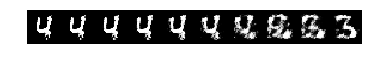

In [47]:
saver = tf.train.Saver()
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "temp/model.ckpt")
    fake_data = sess.run(fake_X, feed_dict={z: np.array(vect_li)})
    visualize_row(fake_data)

# Interpolating with variational autoencoders 

In [48]:
slim = tf.contrib.slim

## variational autoencoder on MNIST

In [49]:
def encoder(x):
    """Network q(z|x)"""
    with slim.arg_scope([slim.fully_connected],
                    activation_fn=tf.nn.relu,
                    weights_initializer=tf.truncated_normal_initializer(0.0, 0.1)):
        mu_logvar = slim.fully_connected(x, 128, scope='fc1')
        mu_logvar = slim.fully_connected(mu_logvar, 128, activation_fn=None, scope='fc2')
        
    return mu_logvar

In [50]:
def decoder(mu_logvar):
    """Network p(x|z)"""
    # Interpret z as concatenation of mean and log variance
    mu, logvar = tf.split(mu_logvar, num_or_size_splits=2, axis=1)

    # Standard deviation must be positive
    stddev = tf.sqrt(tf.exp(logvar))

    # Draw a z from the distribution
    epsilon = tf.random_normal(tf.shape(stddev))
    z = mu + tf.multiply(stddev, epsilon)

    # Decoding arm
    with slim.arg_scope([slim.fully_connected],
                        activation_fn=tf.nn.relu,
                        weights_initializer=tf.truncated_normal_initializer(0.0, 0.1)):        
        x_logits = slim.fully_connected(z, 128, scope='fc1')
        x_logits = slim.fully_connected(x_logits, 784, activation_fn=None, scope='fc2')
        
        # x_hat to be generated from a Bernoulli distribution
        x_dist = tf.contrib.distributions.Bernoulli(logits=x_logits, dtype=tf.float32)
        
    return x_logits, x_dist

In [51]:
def optimizer(x_logits, x, mu_logvar):
    """Define loss functions (reconstruction, KL divergence) and optimizer"""
    with tf.variable_scope('optimizer') as scope:            
        # Reconstruction loss
        reconstruction = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=x_logits), reduction_indices=[1])
 
        # KL divergence
        mu, logvar = tf.split(mu_logvar, num_or_size_splits=2, axis=1)
        kl_d = -0.5 * tf.reduce_sum(1.0 + logvar - tf.square(mu) - tf.exp(logvar), reduction_indices=[1])
        
        # Total loss
        loss = tf.reduce_mean(reconstruction + kl_d)
            
        # ADAM optimizer
        train_step = tf.train.AdamOptimizer().minimize(loss)
    
    return train_step

In [52]:
 def visualize_row_2(image, reconstruction, img_width=28, cmap='gray'):
    """
    Takes in a tensor of images of given width, and displays them in a column
    in a plot, using `cmap` to map from numbers to colors.
    """
    fig, ax = plt.subplots(1, 2)
    image = np.reshape(image, [-1, img_width])
    reconstruction = np.reshape(reconstruction, [-1, img_width])
    plt.figure()
    ax[0].imshow(np.clip(image, 0, 1), cmap=cmap)
    ax[1].imshow(np.clip(reconstruction, 0, 1), cmap=cmap)
    plt.show()

In [99]:
# Reset the graph
tf.reset_default_graph()

# Define input placeholder
x = tf.placeholder(tf.float32,[None, 784], name='x')

# Define VAE graph
with tf.variable_scope('encoder'):
    mu_logvar = encoder(x)
with tf.variable_scope('decoder'):
    x_logits, x_dist = decoder(mu_logvar)
    x_hat = x_dist.sample()

# Optimization
with tf.variable_scope('unlabeled') as scope:
    train_step_unlabeled = optimizer(x_logits, x, mu_logvar)

Iteration 0:


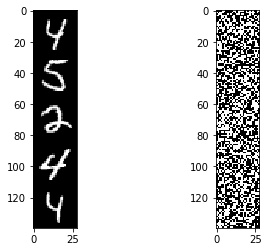

<Figure size 432x288 with 0 Axes>

Iteration 1000:


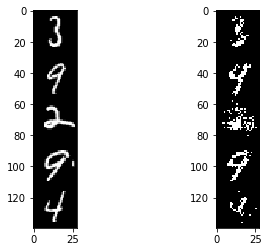

<Figure size 432x288 with 0 Axes>

Iteration 2000:


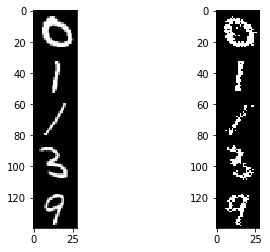

<Figure size 432x288 with 0 Axes>

Iteration 3000:


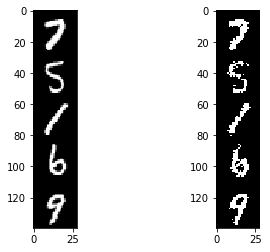

<Figure size 432x288 with 0 Axes>

Iteration 4000:


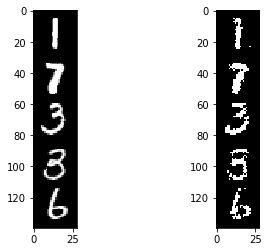

<Figure size 432x288 with 0 Axes>

Iteration 5000:


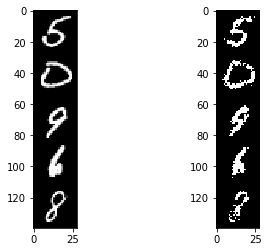

<Figure size 432x288 with 0 Axes>

Iteration 6000:


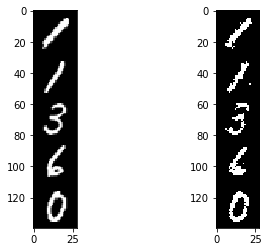

<Figure size 432x288 with 0 Axes>

Iteration 7000:


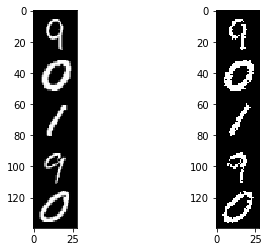

<Figure size 432x288 with 0 Axes>

Iteration 8000:


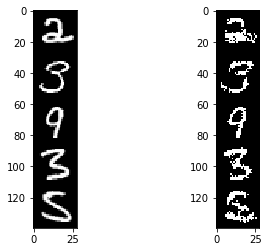

<Figure size 432x288 with 0 Axes>

Iteration 9000:


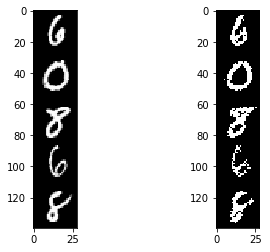

<Figure size 432x288 with 0 Axes>

Iteration 10000:


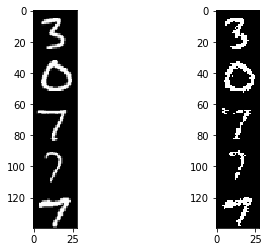

<Figure size 432x288 with 0 Axes>

Iteration 11000:


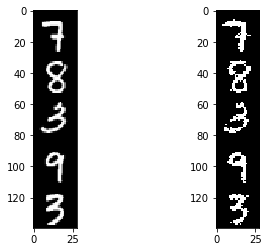

<Figure size 432x288 with 0 Axes>

Iteration 12000:


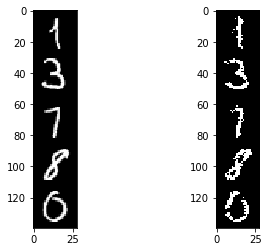

<Figure size 432x288 with 0 Axes>

Iteration 13000:


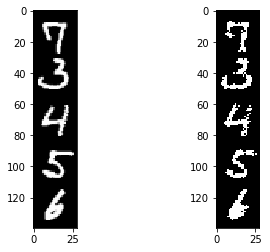

<Figure size 432x288 with 0 Axes>

Iteration 14000:


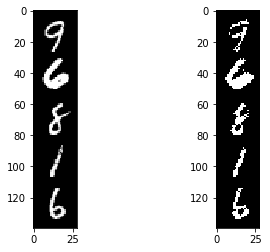

<Figure size 432x288 with 0 Axes>

Iteration 15000:


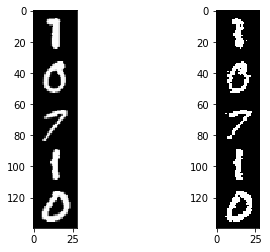

<Figure size 432x288 with 0 Axes>

Iteration 16000:


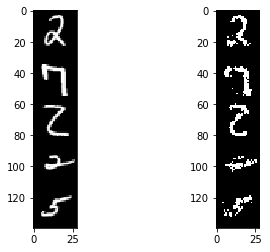

<Figure size 432x288 with 0 Axes>

Iteration 17000:


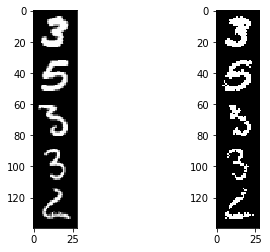

<Figure size 432x288 with 0 Axes>

Iteration 18000:


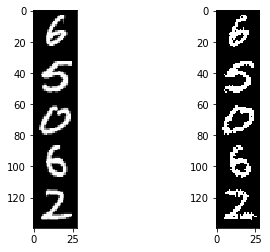

<Figure size 432x288 with 0 Axes>

Iteration 19000:


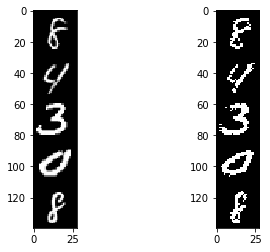

<Figure size 432x288 with 0 Axes>

In [100]:
saver = tf.train.Saver()

with tf.Session() as sess:    
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Train VAE model
    for i in range(20000):        
        # Get a training minibatch
        batch = mnist.train.next_batch(100)
        
        # Binarize the data
        x_binarized = (batch[0] > 0.5).astype(np.float32)
        
        # Train on minibatch
        sess.run(train_step_unlabeled, feed_dict={x: x_binarized}) # No labels
            
        # Visualize reconstructions every 1000 iterations
        if i % 1000 == 0:
            batch = mnist.validation.next_batch(5)
            x_binarized = (batch[0] > 0.5).astype(np.float32)
            reconstructions = sess.run(x_hat, feed_dict={x: x_binarized})
            print("Iteration {0}:".format(i))
            visualize_row_2(batch[0], reconstructions)
            save_path = saver.save(sess, "temp/model_vae.ckpt")

## B) Using the encoder, generate latent representations for 2 images ($Z_{start}$ and $Z_{end}$ ) matching the digit labels 

In [101]:
for i in range (1000):
    batch = mnist.train.next_batch(1)
    if np.argmax(batch[1])==4:
        z_start_im=batch[0]
        print ('FOUND')
        break
for i in range (1000):
    batch = mnist.train.next_batch(1)
    if np.argmax(batch[1])==3:
        z_end_im=batch[0]
        print ('FOUND')
        break

FOUND
FOUND


In [102]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, "temp/model_vae.ckpt")
    x_=np.append(z_start_im, z_end_im, axis=0)
    x_binarized = (x_ > 0.5).astype(np.float32)
    z_=sess.run(mu_logvar, feed_dict={x: x_binarized})

INFO:tensorflow:Restoring parameters from temp/model_vae.ckpt


## Generate (via decoding) and visualize images from 10 steps  $z_{start}=z_{1},...,z_{10}=z_{end}$  using linear interpolation.

INFO:tensorflow:Restoring parameters from temp/model_vae.ckpt


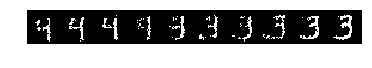

In [121]:
z_start=z_[0]
z_end=z_[1]
vect_li=np.array(linear_interp(z_start, z_end))
saver = tf.train.Saver()

with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "temp/model_vae.ckpt")
    x_binarized = (vect_li > 0.5).astype(np.float32)
    fake_data = sess.run(x_hat, feed_dict={mu_logvar: vect_li})
    visualize_row(fake_data)




# Conditioning on class labels

In [ ]:
# Graph parameters
z_dimension = 32
intermediate_layer_size = 128
image_size = 784

# Training parameters
batch_size = 70
iterations = 30000

### A) Modify the code from before to take as input a vector 10 times larger.

In [134]:
#generator
def generator(z, y):
    # Concatenate z and y
    inputs = tf.concat([z, y],1)
    hidden_layer = tf.layers.dense(inputs, intermediate_layer_size, name="G1", activation=tf.nn.relu)
    fake_X = tf.layers.dense(hidden_layer, image_size, name="G2", activation=tf.sigmoid)
    return fake_X

### B) Modify the code from before to take as input the concatenation of � (random vector) and a one-hot vector encoding of the labels.


In [135]:
 # Discriminator
def discriminator(images, y):
    # Concatenate x and y
    inputs = tf.concat([images, y],1)
    
    hidden_layer = tf.layers.dense(inputs, intermediate_layer_size, name="D1", activation=tf.nn.relu)
    D_output = tf.layers.dense(hidden_layer, 1, name="D2", activation=tf.sigmoid)
    return D_output

## C) Train the GAN.

In [132]:


tf.reset_default_graph()

# Placeholders
real_X = tf.placeholder(tf.float32, [None, image_size])
Y=tf.placeholder(tf.float32,[None, 10])
z = tf.placeholder(tf.float32, [None, z_dimension])



# Generator
with tf.variable_scope("generator") as scope:
    fake_X = generator(z, Y)

# Discriminator
with tf.variable_scope("discriminator") as scope:
    d_on_fake = discriminator(fake_X, Y)
    scope.reuse_variables()
    d_on_real = discriminator(real_X, Y)

# Loss
g_loss = -tf.reduce_mean(tf.log(d_on_fake))
d_loss = -tf.reduce_mean(tf.log(d_on_real) + tf.log(1. - d_on_fake))

# Optimizer
optimizer = tf.train.AdamOptimizer()
d_step = optimizer.minimize(d_loss, var_list=variables_from_scope("discriminator"))
g_step = optimizer.minimize(g_loss, var_list=variables_from_scope("generator"))

# Initializer
initialize_all = tf.global_variables_initializer()




Iter [       0] Time [0.2395] d_loss [1.4086]


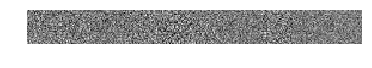

Iter [    1000] Time [9.1734] d_loss [0.0288]


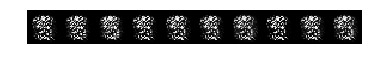

Iter [    2000] Time [18.1496] d_loss [0.0458]


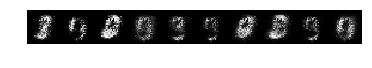

Iter [    3000] Time [26.4097] d_loss [0.0729]


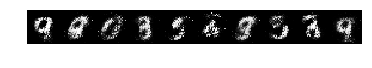

Iter [    4000] Time [34.7597] d_loss [0.0773]


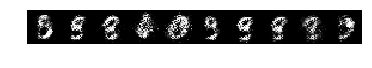

Iter [    5000] Time [44.3998] d_loss [0.2189]


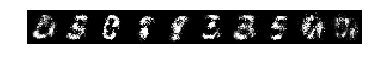

Iter [    6000] Time [52.9610] d_loss [0.2900]


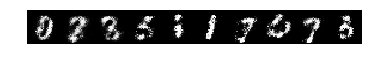

Iter [    7000] Time [61.5079] d_loss [0.4206]


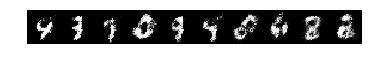

Iter [    8000] Time [69.9108] d_loss [0.4021]


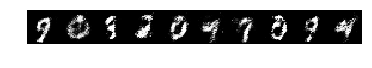

Iter [    9000] Time [78.8433] d_loss [0.3658]


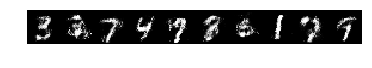

Iter [   10000] Time [86.9295] d_loss [0.6668]


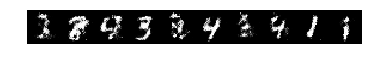

Iter [   11000] Time [95.2395] d_loss [0.6902]


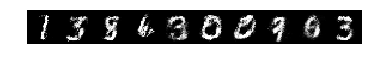

Iter [   12000] Time [103.1597] d_loss [1.0186]


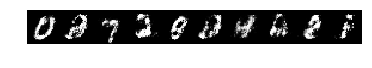

Iter [   13000] Time [111.3998] d_loss [0.7090]


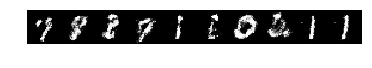

Iter [   14000] Time [119.9075] d_loss [0.7551]


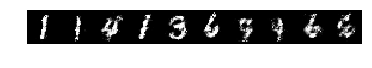

Iter [   15000] Time [128.5998] d_loss [0.8955]


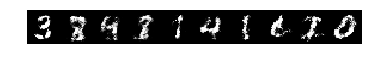

Iter [   16000] Time [137.7083] d_loss [0.8790]


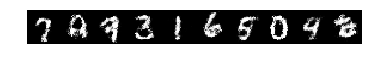

Iter [   17000] Time [146.4696] d_loss [0.9253]


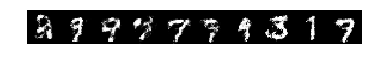

Iter [   18000] Time [155.3331] d_loss [0.7492]


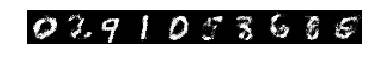

Iter [   19000] Time [163.7086] d_loss [1.0257]


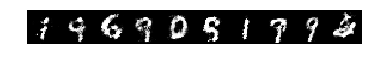

Iter [   20000] Time [172.1597] d_loss [0.8346]


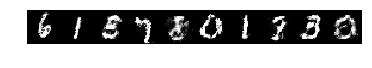

Iter [   21000] Time [180.2697] d_loss [0.8511]


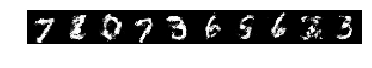

Iter [   22000] Time [188.3398] d_loss [0.9526]


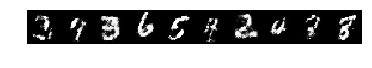

Iter [   23000] Time [196.3799] d_loss [0.7544]


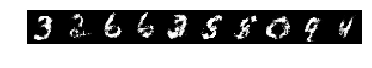

Iter [   24000] Time [204.4484] d_loss [0.7867]


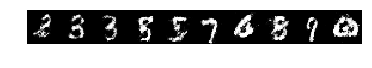

Iter [   25000] Time [212.5197] d_loss [0.9528]


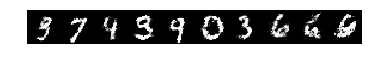

Iter [   26000] Time [220.5797] d_loss [0.8829]


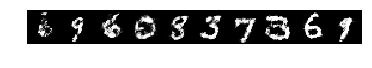

Iter [   27000] Time [228.7476] d_loss [0.9567]


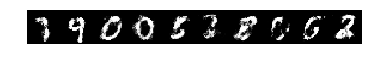

Iter [   28000] Time [236.9797] d_loss [0.9772]


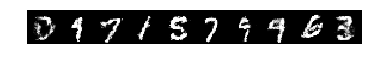

Iter [   29000] Time [245.0198] d_loss [0.8468]


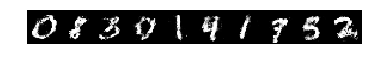

Iter [   29999] Time [253.2700] d_loss [1.0241]


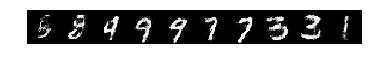

In [133]:
# Train the GAN.
def make_noise():
    return np.random.uniform(-1.0, 1.0, [batch_size, z_dimension])

def next_feed_dict():
    batch=mnist.train.next_batch(batch_size)
    return {real_X: batch[0],
            z:      make_noise(),
           Y: batch[1]}
saver = tf.train.Saver()

def one_hot():
    return np.eye(10)[np.random.randint(10, size=batch_size)]
#sess = tf.Session()
#sess.run(initialize_all)

start_time = time.time()
with tf.Session() as sess:
    sess.run(initialize_all)
    for t in range(iterations):
        sess.run(g_step, feed_dict=next_feed_dict())
        _, loss = sess.run([d_step, d_loss], feed_dict=next_feed_dict())

        if t % 1000 == 0 or t+1 == iterations:
            fake_data = sess.run(fake_X, feed_dict={z: make_noise(), Y:one_hot()})
            print('Iter [%8d] Time [%5.4f] d_loss [%.4f]' % (t, time.time() - start_time, loss))
            visualize_row(fake_data[:10])
            save_path = saver.save(sess, "temp/model_cond.ckpt")

## D) Generate and visualize 10 images from each digit by setting the labels accordingly as inputs to the generator and $\epsilon$ at random from its distribution.

INFO:tensorflow:Restoring parameters from temp/model_cond.ckpt


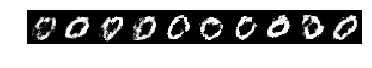

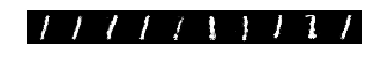

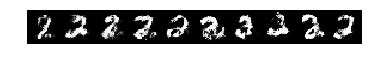

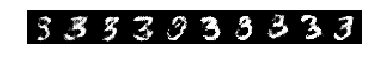

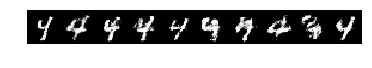

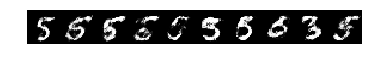

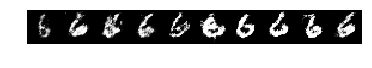

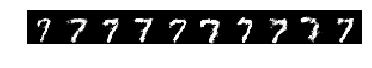

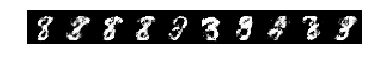

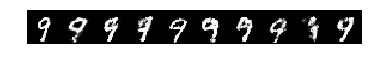

In [151]:
#create noise
noise=np.random.uniform(-1.0, 1.0, [10, z_dimension])
saver = tf.train.Saver()
with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "temp/model_cond.ckpt")
    for i in range(10):
        #10 onehot vectors with label i
        one_fake=np.eye(10)[np.full((10),i)]
        fake_data = sess.run(fake_X, feed_dict={z: noise, Y: one_fake})
        visualize_row(fake_data)